# Starter
This notebook serves as a tutorial for OpenAI [Gym](https://www.gymlibrary.dev/). Gym is a standard Python API for Reinforcement Learning (RL), which includes a collection of pre-built environments and supports their representation, exploitation and testing.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gym

The first building block we encounter is the ```Env``` class. This implements a simulation of the environment we want to use. Since Gym has a lot of built-in environments, we'll start from one of them,  ```MountainCar```. Mountain Car is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill.

In [2]:
# Create the Mountain Car environment and set the render mode to rgb_array so to have a picture of the environment available at each step
env = gym.make('MountainCar-v0', render_mode='rgb_array')

Now that we created our environment, we have to understand how to interact with it and what we can extrapolate from it. The environment puts at our disposal two important attributes:
- ```observation_space```: what we know about the environment at each timestep (e.g., our position, our speed, the target position, etc.)
- ```action_space```: what we can perform inside the environment (e.g., turn left, turn right, accelerate, brake, etc.) 

The Mountain Car environment has an observation space with shape (2,), composed of the X-position of the Car and its velocity. The action space includes 3 possible actions: accelerate to the left, don't accelerate, accelerate to the right.

In [3]:
obs_space = env.observation_space
action_space = env.action_space
print(f'The observation space: {obs_space}') # Strucure: Low, High, shape, type
print(f'The action space: {action_space}')

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


## Interaction with the environment
Two main functions allows the Agent to interact with the environment, ```reset``` and ```step```.

- ```reset```: It resets the environment to its initial state. This is useful if the episode has terminated or something went wrong. It returns:
    - ```observation```: The initial observation
    - ```info```: Auxiliary diagnostic information (helpful for debugging, learning, and logging)   
- ```step```: This function takes an action in input and execute it inside the environment. Afterwards, five values are returned:
    - ```observation```: The new observation collected after the action execution
    - ```reward```: A numerical value which is given to the Agent. An incentive mechanism that tells the agent what is correct and what is wrong, useful for RL purposes
    - ```terminated```: Whether a _terminal state_ (as defined under the MDP of the task) is reached
    - ```truncated```: Whether a truncation condition outside the scope of the MDP is satisfied. Typically a timelimit, but could also be used to indicate agent physically going out of bounds
    - ```info```: Auxiliary diagnostic information (helpful for debugging, learning, and logging)


In [4]:
# reset the environment and see the initial observation
obs, _ = env.reset()
print(f'Current observation: {obs}')

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# # Take the action and get the new observation space
new_obs, reward, terminated, truncated, info = env.step(random_action)
print(f'New observation: {new_obs}')

Current observation: (array([-0.42871535,  0.        ], dtype=float32), {})
New observation: [-0.4304174  -0.00170205]


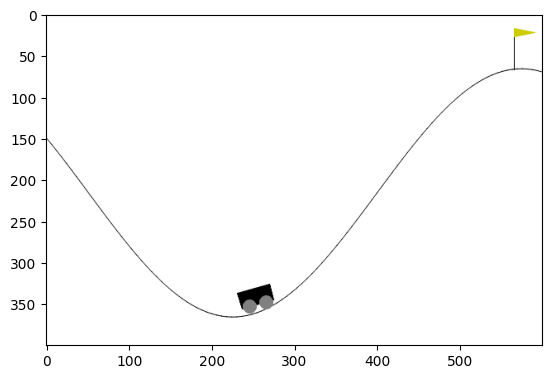

In [5]:
env_pic = env.render()
plt.imshow(env_pic)

# Close the environment
env.close()